In [1]:
# read in some helpful libraries
import nltk # the natural langauage toolkit, open-source NLP
import pandas as pd # dataframes
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from collections import Counter

# initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
### Read our train data into a dataframe
texts = pd.read_csv("train.csv", encoding = 'latin-1')

# look at the first few rows of texts
texts.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [5]:
# split the data by author
byAuthor = texts.groupby("author")

# create empty dictionary to store combined sentences for each author
sentence_dict = {}

# create empty dictionary to store tokenized sentences for each author
token_dict = {}

# for each author...
for name, group in byAuthor:
    # get all of the sentences they wrote and collapse them into a
    # single long string
    sentences = group['text'].str.cat(sep = ' ')
    
    # convert everything to lower case (so "The" and "the" get counted as 
    # the same word rather than two different words)
    sentences = sentences.lower()
    
    sentence_dict[name] = (sentences)
    
    # split the text into individual tokens (words)  
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    token_dict[name] = (tokens)

In [7]:
# Get parts-of-speech for each author using 

firstPerson = ['i', 'me', 'we', 'us']
secondPerson = ['you'] 
thirdPerson = ['he', 'she', 'it', 'him', 'her', 'it', 'they', 'them']
firstCount = {}
secondCount = {}
thirdCount = {}

for key in token_dict:
    counts = Counter(token_dict[key])
    firstCount[key] = { pronoun: counts[pronoun] for pronoun in firstPerson }
    secondCount[key] = { pronoun: counts[pronoun] for pronoun in secondPerson } 
    thirdCount[key] = { pronoun: counts[pronoun] for pronoun in thirdPerson } 

In [8]:
firstCount

{'EAP': {'i': 91, 'me': 18, 'us': 8, 'we': 36},
 'HPL': {'i': 78, 'me': 11, 'us': 4, 'we': 5},
 'MWS': {'i': 145, 'me': 42, 'us': 3, 'we': 15}}

In [87]:
# unpack dictionaries into DataFrames 
authors = ['EAP', 'HPL', 'MWS']
first = []
second = []
third = []

# df for first person pronouns
for name in authors:
    temp = []
    pronoun = []
    values = []
    for key, value in firstCount[name].items():
        temp = [key,value]
        pronoun.append(temp[0])
        values.append(temp[1])
    df1 = pd.DataFrame({'Pronoun': pronoun,
                 name: values,
                }).set_index('Pronoun')
    first.append(df1)
first = pd.concat(first, axis=1)

# df for second person pronouns
for name in authors:
    temp = []
    pronoun = []
    values = []
    for key, value in secondCount[name].items():
        temp = [key,value]
        pronoun.append(temp[0])
        values.append(temp[1])
    df1 = pd.DataFrame({'Pronoun': pronoun,
                 name: values,
                }).set_index('Pronoun')
    second.append(df1)
second = pd.concat(second, axis=1)

# df for third person pronouns
for name in authors:
    temp = []
    pronoun = []
    values = []
    for key, value in thirdCount[name].items():
        temp = [key,value]
        pronoun.append(temp[0])
        values.append(temp[1])
    df1 = pd.DataFrame({'Pronoun': pronoun,
                 name: values,
                }).set_index('Pronoun')
    third.append(df1)
third = pd.concat(third, axis=1)

third

,EAP,HPL,MWS
Pronoun,,,
he,26,48,47
she,9,1,21
it,65,35,18
him,5,16,13
her,13,3,44
they,12,12,14
them,11,6,9


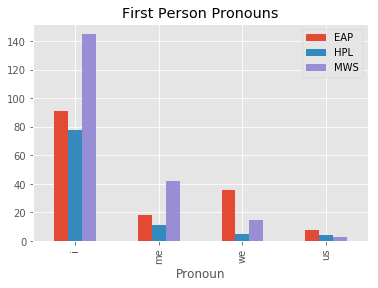

In [103]:
# Plot pronoun DataFrames
first.plot(kind ='bar')
plt.title('First Person Pronouns')
plt.show()

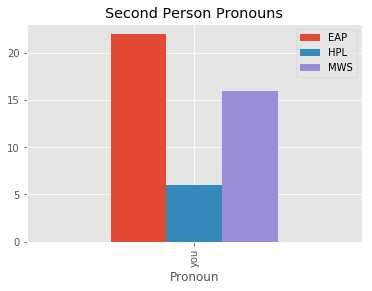

In [104]:
second.plot(kind ='bar')
plt.title('Second Person Pronouns')
plt.show()


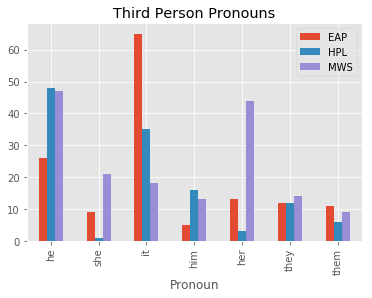

In [105]:
third.plot(kind = 'bar')
plt.title('Third Person Pronouns')
plt.show()
